<a href="https://colab.research.google.com/github/Z3Gu1/Notebooks/blob/main/Coracao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP de Análise de Dados e Boas Práticas
Profs. Tatiana Escovedo e Hugo Villamizar

##Aluno: José Guilherme Campos Machado

## 1. Definição do problema

O dataset adotado contem informações referentes a pacientes do hospital de Cleveland. O conjunto de dados consiste nos dados de 303 indivíduos. Há 14 colunas no conjunto de dados (que foram extraídas de um conjunto maior de 75). Não há valores ausentes. A tarefa de classificação é prever se um indivíduo está sofrendo de doença cardíaca ou não. 
O dataset chama "*Cleveland Heart Disease*" e pertence ao acervo do site UCI e pode ser consultado em https://archive.ics.uci.edu/ml/datasets/Heart+Disease. 



**Informações sobre os atributos:**


  01. **idade:** Idade (anos)
  02. **sexo:** Sexo (**1** masculino, **0** feminino)
  03. **cp:** Dores no peito (chest pain) (**1** angina tipica, **2** angina atipica, **3** dor torácica não anginal, **4** assintomático)
  04. **pa:** pressão arterial em repouso (em mm Hg na adimissão ao hospital)
  05. **col:** colesterol mg/dl
  06. **gli:** glicose > 120 mg/dl (**1** verdadeiro, **0** falso)
  07. **ecg:** eletrocardiograma repouso (**0** normal, **1** anormalidades da onda ST-T , **2** hipertrofia ventricular esquerda provável ou definitiva)
  08. **maxbpm:** batimentos cardiacos maximo alcançado
  09. **exang:** exercicio induz angina? (**1** sim, **0** não)
  10. **oldpeak:** depressão do segmento ST induzida pelo exercício em relação ao repouso. Esse atributo mede a depressão do segmento ST do eletrocardiograma (ECG) induzida pelo exercício físico em relação ao repouso. A depressão do segmento ST é uma medida da isquemia miocárdica, que é uma redução do suprimento de sangue ao músculo cardíaco, geralmente devido a uma obstrução nas artérias coronárias. É expresso em milímetros (mm).  **Valores elevados de "Oldpeak" podem indicar uma isquemia miocárdica mais acentuada** e um risco maior de complicações cardíacas.
  11. **slope:**  inclinação do segmento ST (ou elevação do ponto J) no eletrocardiograma (ECG)
1. indica uma inclinação ascendente do segmento ST durante o pico do exercício, o que é considerado normal e indica menor risco de eventos cardiovasculares futuros
2. indica um segmento ST plano durante o pico do exercício, o que pode indicar uma doença arterial coronariana em estágio inicial e um risco moderado de eventos cardiovasculares futuros
3. indica uma inclinação descendente do segmento ST durante o pico do exercício, o que indica uma doença arterial coronariana mais grave e um risco elevado de eventos cardiovasculares futuros

  12. **ca:** número de vasos sanguíneos importantes no coração que foram visualizados durante uma angiografia coronária(**0-3**) coloridas por fluoroscopia.
  13. **thal:** thalassemia, teste de estresse nuclear (**3** normal, **6** defeito fixo, **7** defeito reversível)
  14. **num:** status da doença arterial coronariana diagnosticada pelo exame angiográfico (**0** Ausência de doença cardíaca, **1** Presença de doença cardíaca, **2 3** e **4** Presença de doença cardíaca com diferentes graus de gravidade)


In [50]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:

# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

##2. Carga de Dados

A importação do dataset será através do pacote Pandas (Python Data Analysis Library), um arquivo .csv sem cabeçalho disponibilizado no github.

Com o dataset carregado, iremos explorá-lo um pouco.


In [16]:

# Como o cabeçalho não está no arquivo, aqui preparamos os nomes das colunas para importar junto
colunas = ['idade', 'sexo', 'cp', 'pa', 'col', 'gli', 'ecg', 'maxbpm', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

# carga do dataset através de um arquivo localizado no guithub
filename = "https://raw.githubusercontent.com/Z3Gu1/Datasets/main/processed.cleveland.data.csv" 

heart = pd.read_csv(filename, names=colunas)


In [17]:
# verifica o tipo do dataset heart
print(type(heart))

<class 'pandas.core.frame.DataFrame'>


In [18]:
# exibe as primeiras linhas para verificar se a importação ocorreu de acordo com o esperado
heart.head()

,idade,sexo,cp,pa,col,gli,ecg,maxbpm,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


##3. Analise de Dados

### 3.1. Estatísticas Descritivas

Iniciaremos explorando um pouco o dataset heart, suas dimensões, informações e alguns exemplos de linhas.

In [19]:
# Mostra as dimensões do dataset
print(heart.shape)

(303, 14)


In [20]:
# Mostra as informações do dataset
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   idade    303 non-null    float64
 1   sexo     303 non-null    float64
 2   cp       303 non-null    float64
 3   pa       303 non-null    float64
 4   col      303 non-null    float64
 5   gli      303 non-null    float64
 6   ecg      303 non-null    float64
 7   maxbpm   303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  num      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None


In [21]:
# Mostra as 10 primeiras linhas do dataset
heart.head(10)

,idade,sexo,cp,pa,col,gli,ecg,maxbpm,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [22]:
# Mostra as 10 últimas linhas do dataset
heart.tail(10)

,idade,sexo,cp,pa,col,gli,ecg,maxbpm,exang,oldpeak,slope,ca,thal,num
293,63.0,1.0,4.0,140.0,187.0,0.0,2.0,144.0,1.0,4.0,1.0,2.0,7.0,2
294,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1
295,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0
296,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,3
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


Verificar os tipos de dados é um primeiro passo importante para garantir que você possa trabalhar com o conjunto de dados de forma precisa e eficaz. Os tipos de dados podem afetar diretamente a forma como você manipula e analisa o dataset.

É importante também verificar as estatísticas descritivas que nos fornrecem uma visão geral dos dados para posterior aprofundamento em uma análise mais 
completa.


In [23]:
# Verificando novamente os tipos de dados das colunas
heart.dtypes

idade      float64
sexo       float64
cp         float64
pa         float64
col        float64
gli        float64
ecg        float64
maxbpm     float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
num          int64
dtype: object

In [34]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
heart.describe()

,idade,sexo,cp,pa,col,gli,ecg,maxbpm,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


Vamos agora verificar o balanceamento das cargas do dataset. Em um primeiro momento pode parecer que as classes estão desbalanceadas visto que a classe **0** referente a "Ausência de Doença Cardíaca" é muito maior que as outras porém todas as outras classes juntas representam "Presença de doença cardíaca" 

O que ocorre não é exatamente um desbalanceamento mas esta situação precisará ser tratada posteriormente.

In [36]:
# distribuição das classes
print(heart.groupby('num').size())

num
0    164
1     55
2     36
3     35
4     13
dtype: int64


### 3.2. Visualizações Unimodais

Vamos criar agora um histograma para cada atributo do dataset. Veremos que os atributos age, pedi e test seguem uma distribuição exponencial, e que as colunas mass e press seguem uma distribuição aproximadamente normal.

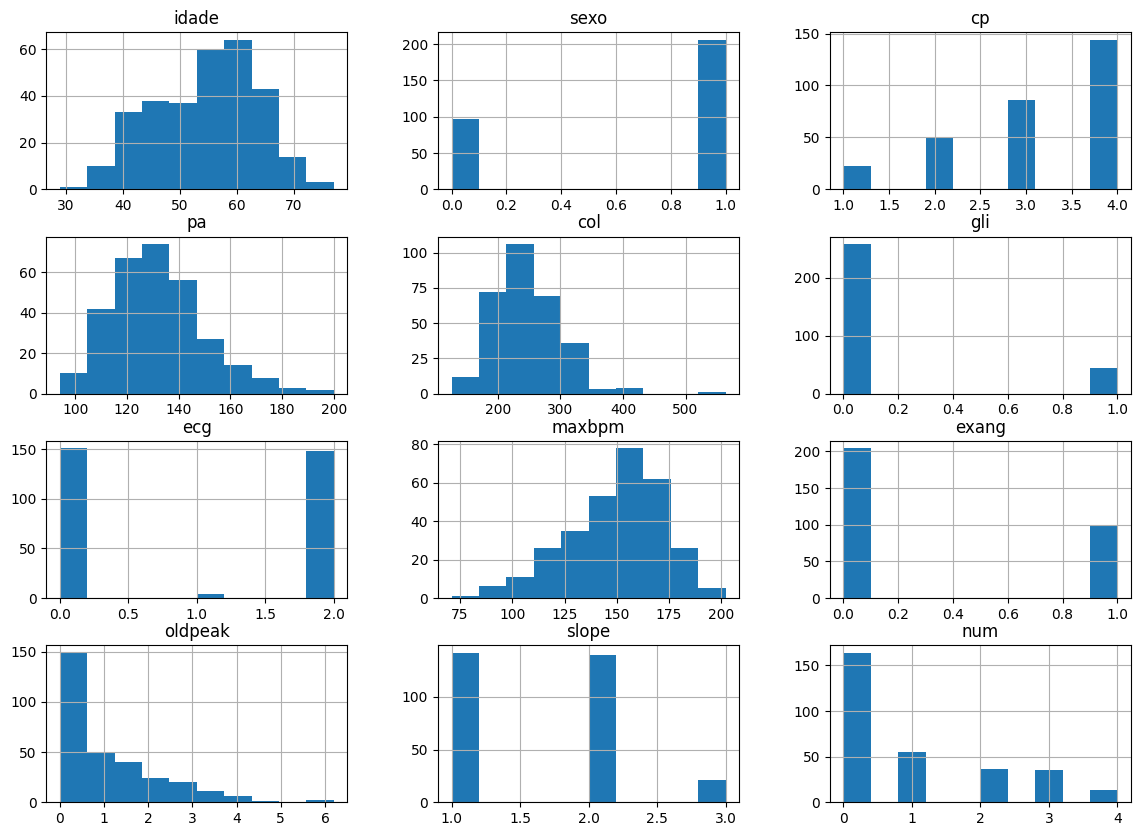

In [41]:
# Histograma
heart.hist(figsize = (14,10))
plt.show()

O Gráfico de Densidade, ou Density Plot, é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele, pode ser mais fácil identificar a distribuição do atributos do dataset. Assim como fizemos com o histograma, vamos criar um density plot para cada atributo do dataset.

Veremos que muitos dos atributos têm uma distribuição distorcida. Uma transformação como a Box-Cox, que pode aproximar a distribuição de uma Normal, pode ser útil neste caso.


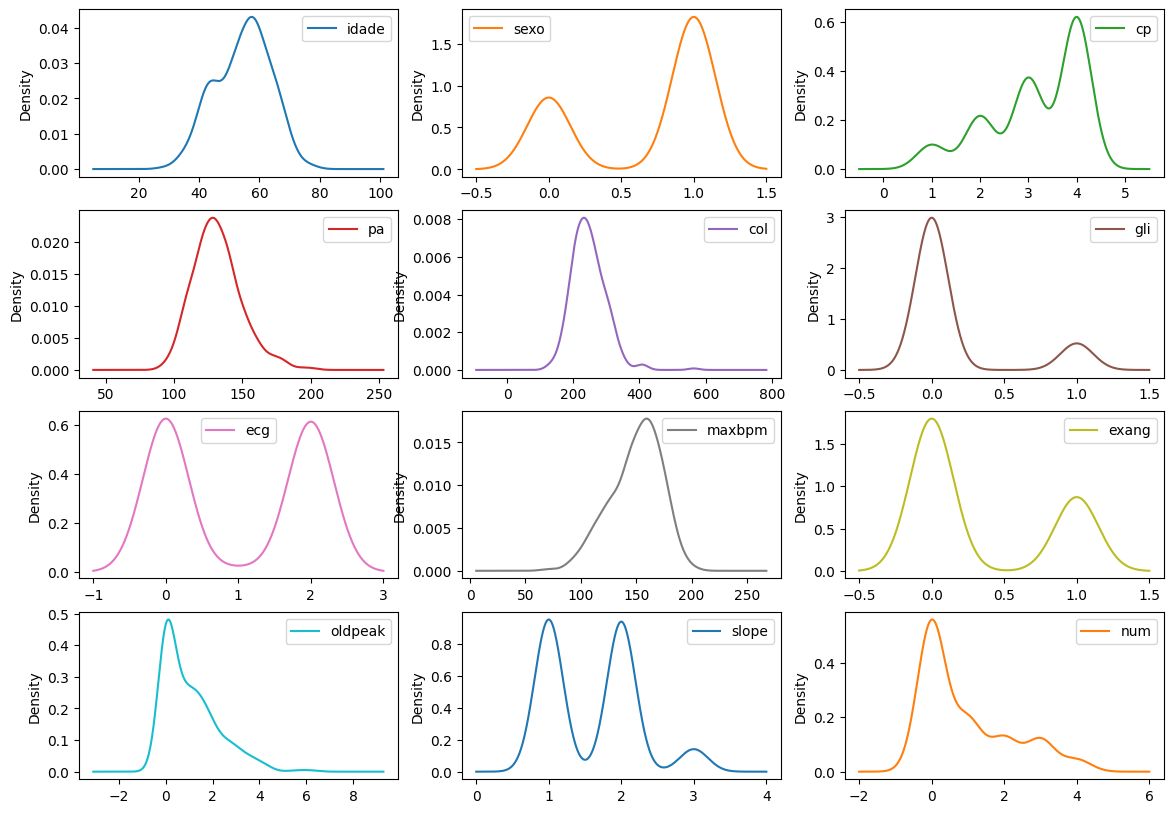

In [46]:
# Density Plot
heart.plot(kind = 'density', subplots = True, layout = (4,3), sharex = False, figsize = (14,10))
plt.show()

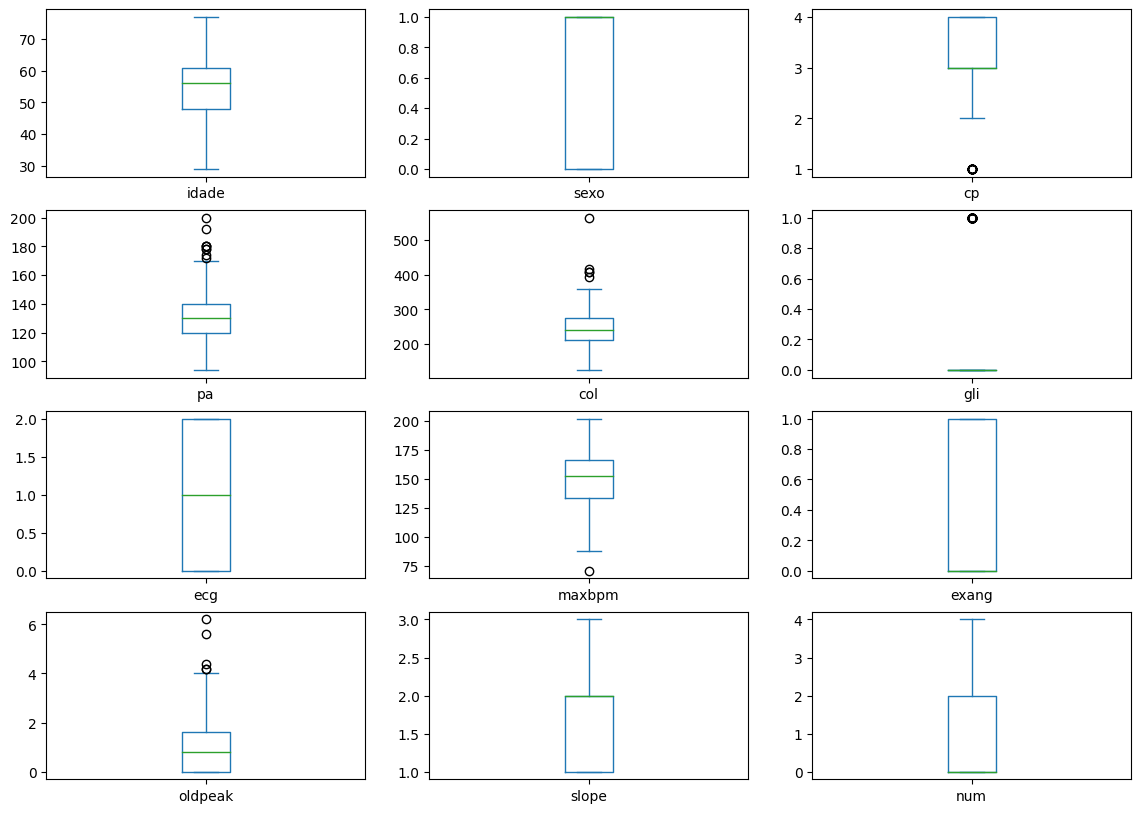

In [47]:
heart.plot(kind = 'box', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (14,10))
plt.show()

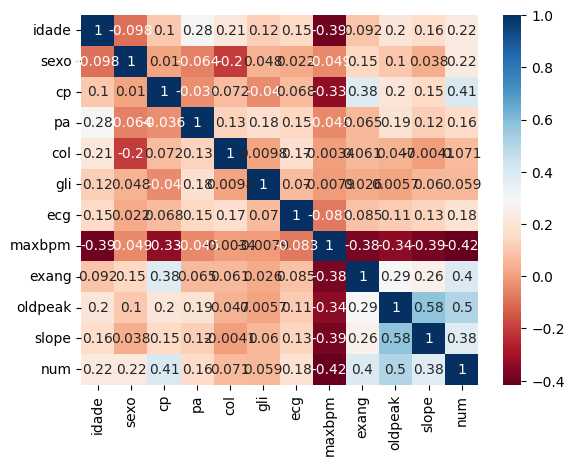

In [51]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(heart.corr(), annot=True, cmap='RdBu');

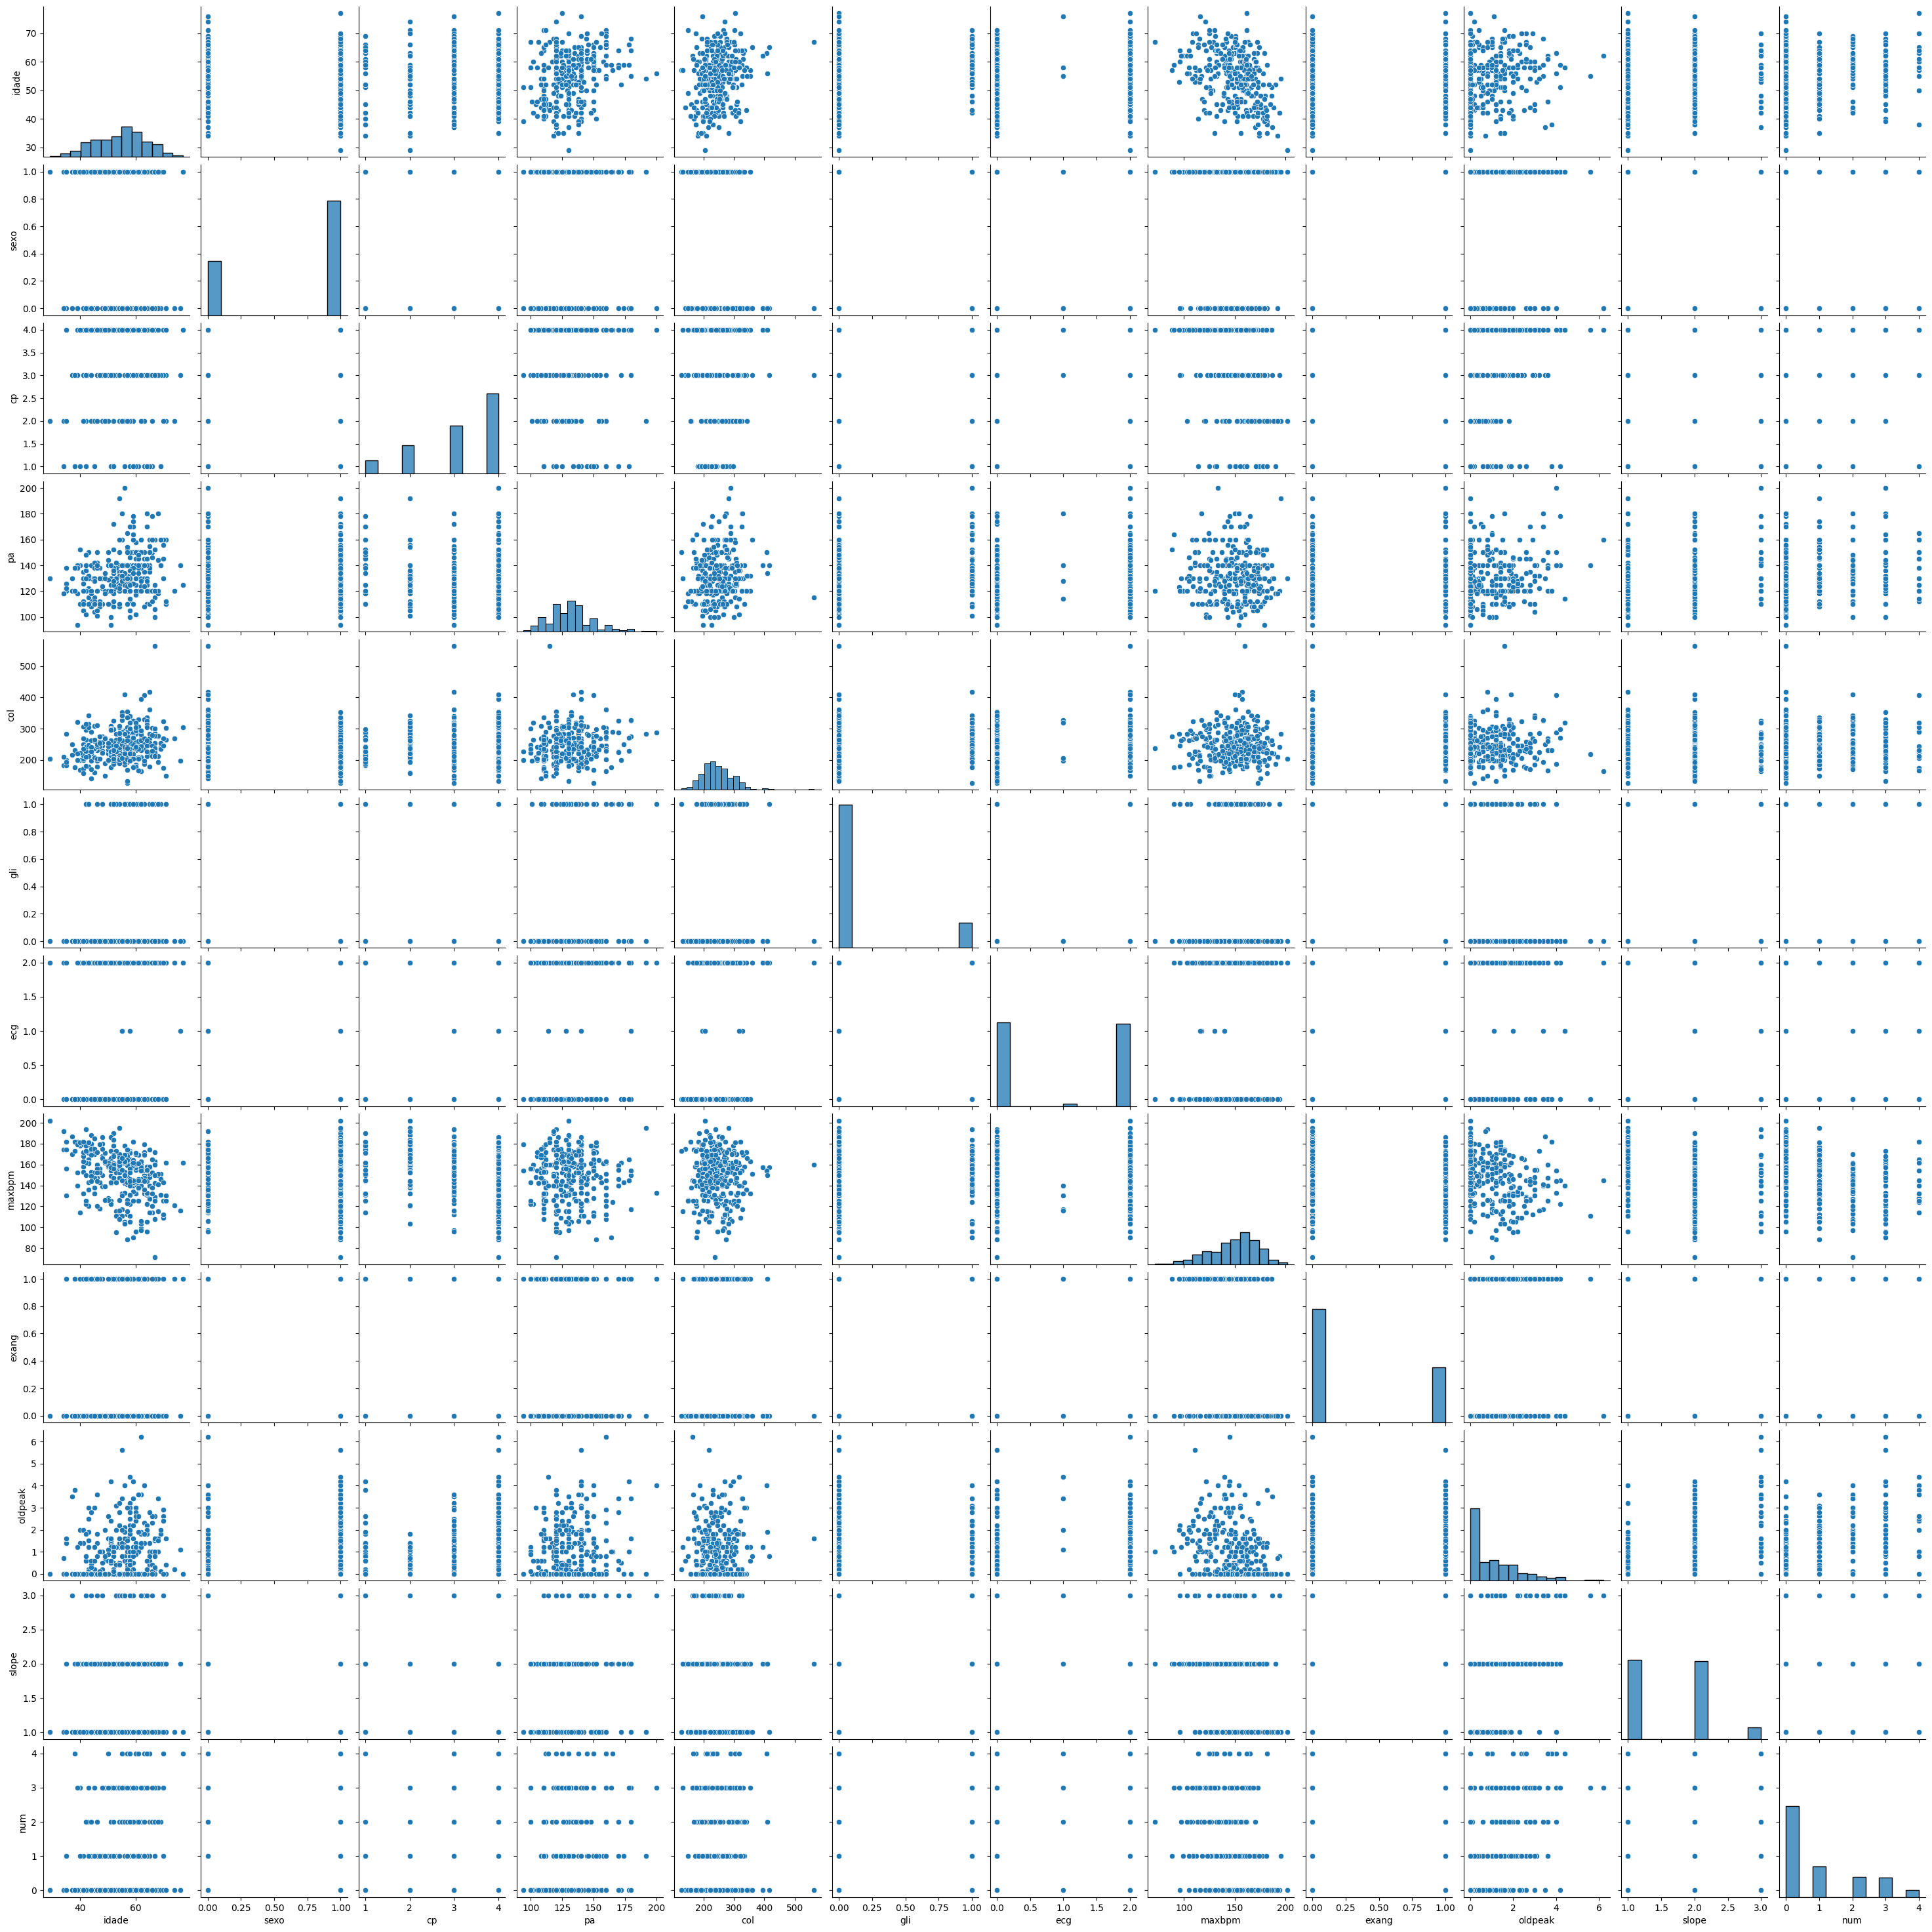

In [53]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(heart)

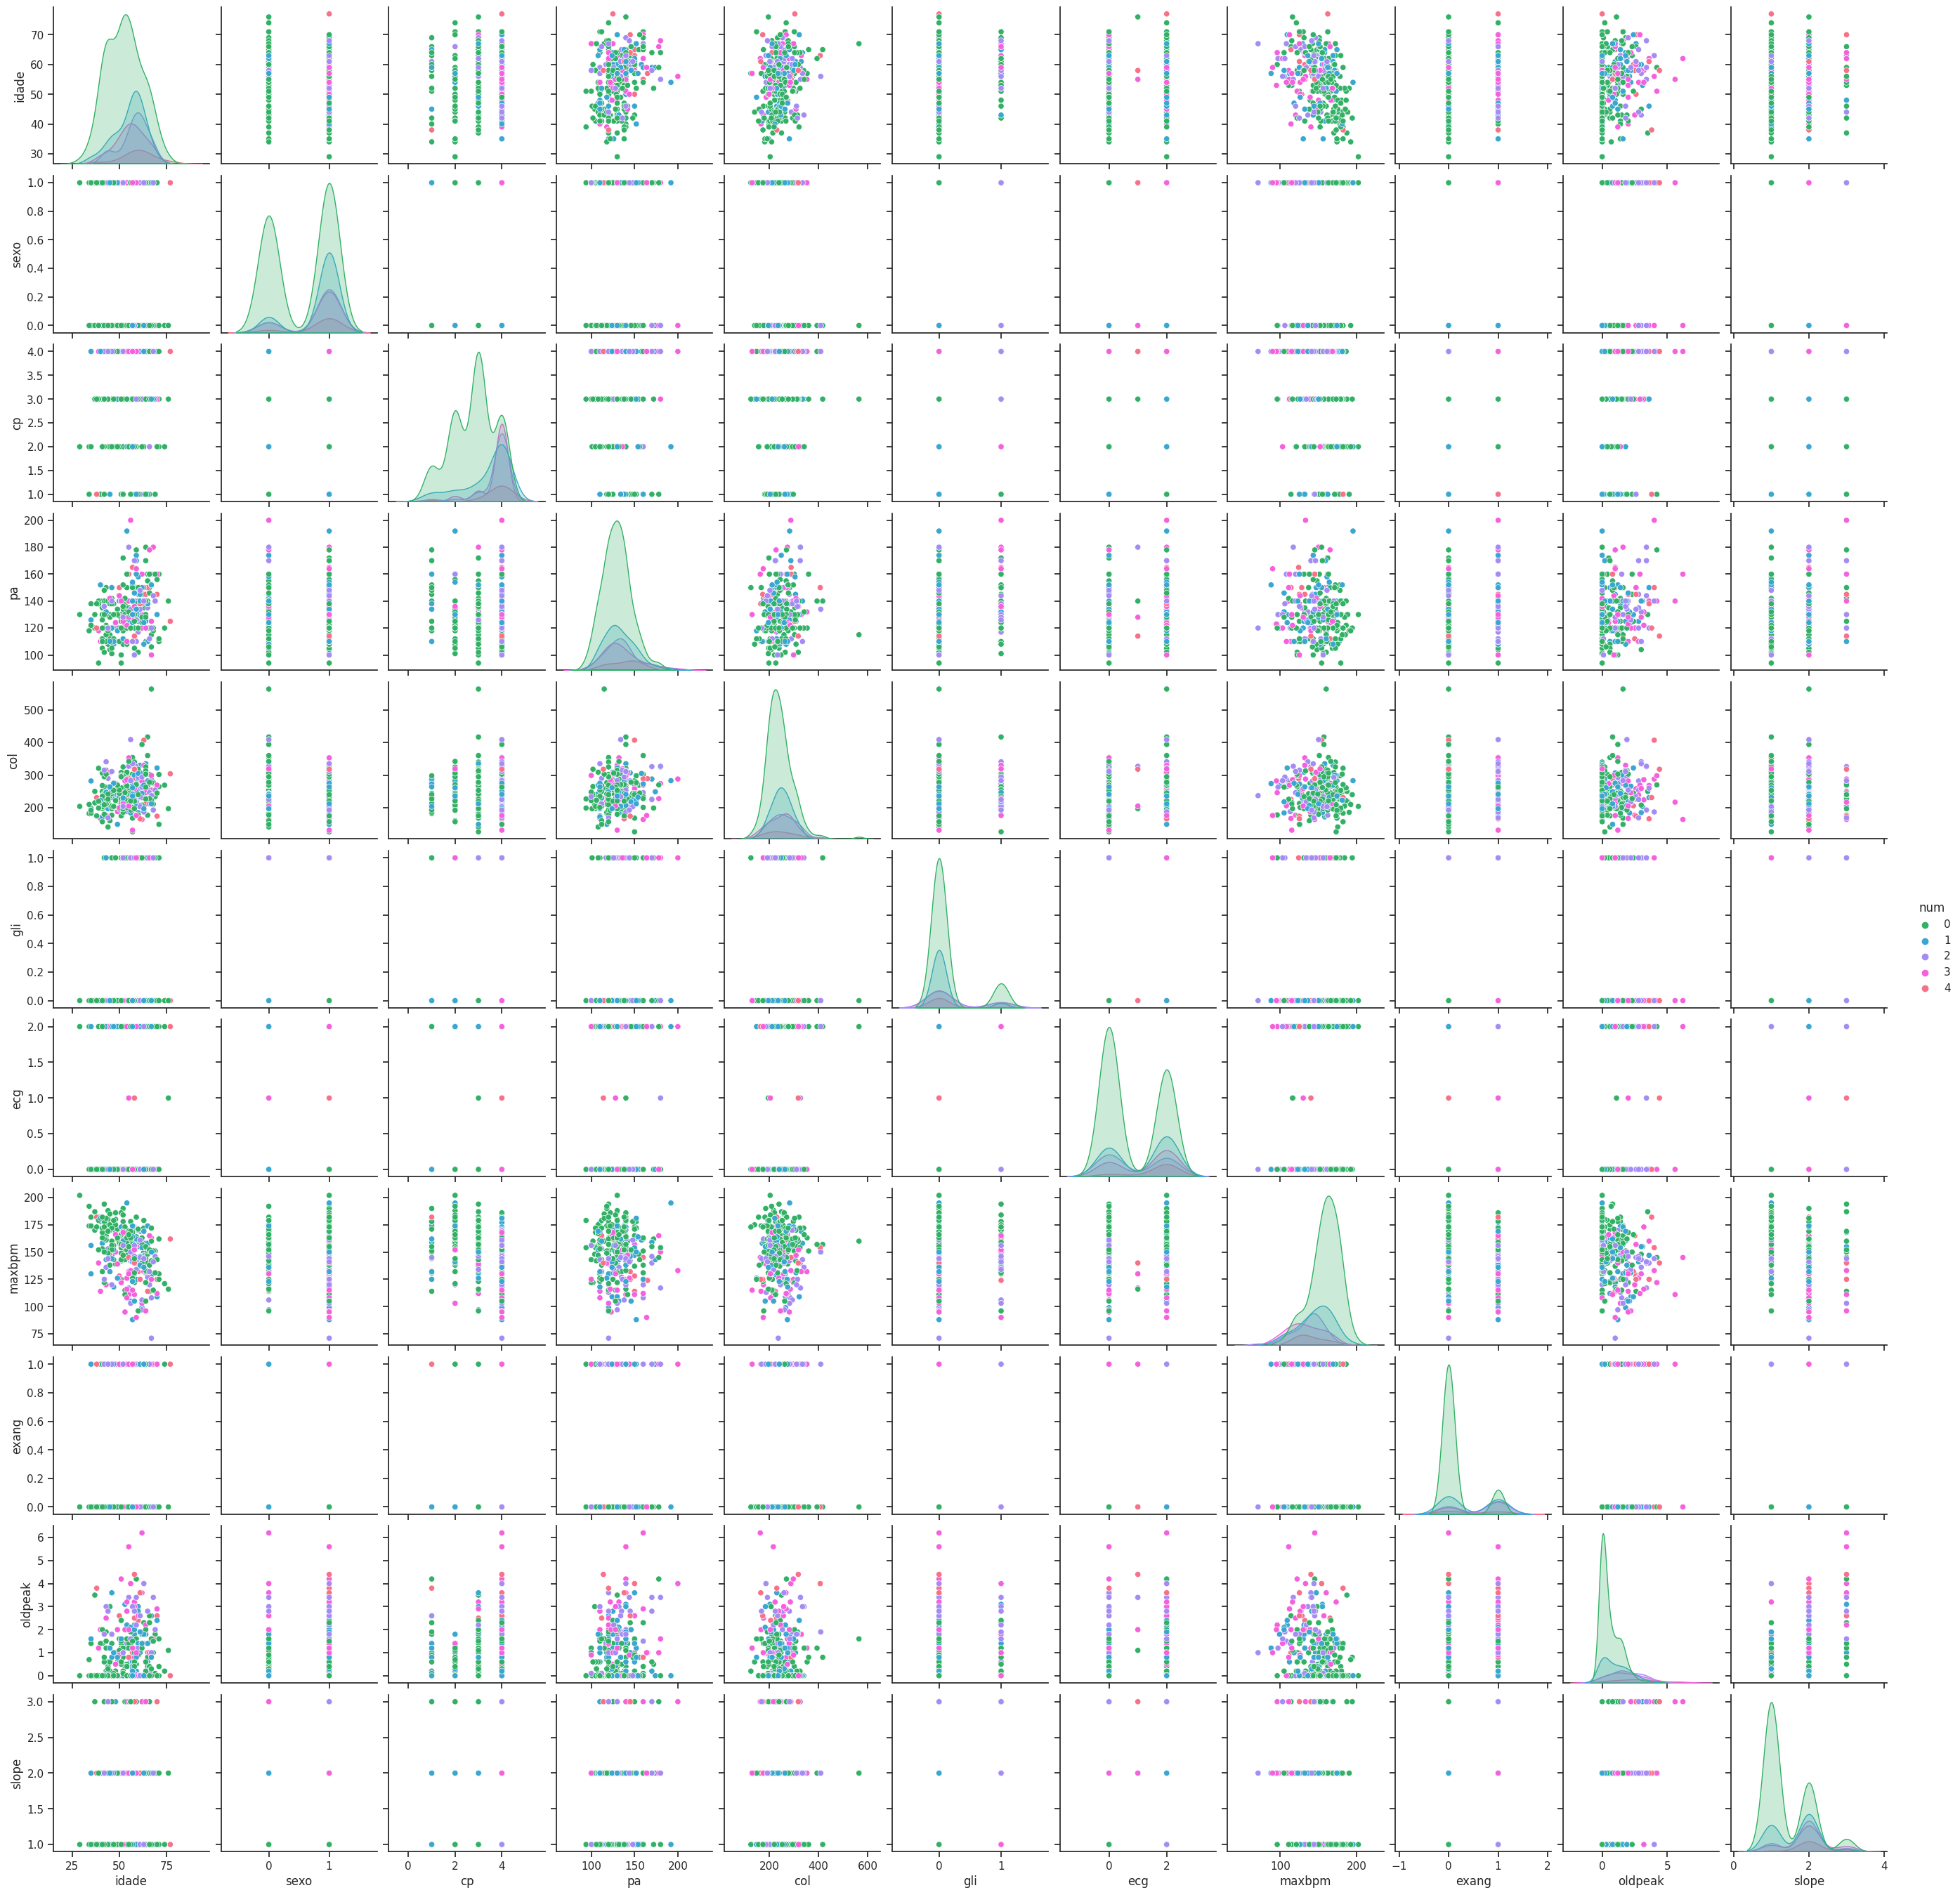

In [76]:
# Scatter Plot com Seaborn - Variação 2

sns.set(style="ticks", color_codes=True)
palette_colors = sns.color_palette("husl", 8)

color_0 = palette_colors[3]
color_1 = palette_colors[5]
color_2 = palette_colors[6]
color_3 = palette_colors[7]
color_4 = palette_colors[0]

#palette = sns.blend_palette([color_0, color_1, color_2, color_3, color_4])
palette = [color_0, color_1, color_2, color_3, color_4]

sns.pairplot(heart, hue="num", palette=palette)